<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-7/blob/main/ClasificacionImagenesAntiguas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install fastai --upgrade

     |████████████████████████████████| 204kB 7.5MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [2]:
!gdown --id 13E73K0zwHsxJcoqVxRa83pAVH3No9Zzr

Downloading...
From: https://drive.google.com/uc?id=13E73K0zwHsxJcoqVxRa83pAVH3No9Zzr
To: /content/riojamemoria.zip
6.66GB [01:33, 71.3MB/s]


In [3]:
!gdown --id 1hWUAYJG1-MTUfJxHnsfkzQjo-HrIvP0b

Downloading...
From: https://drive.google.com/uc?id=1hWUAYJG1-MTUfJxHnsfkzQjo-HrIvP0b
To: /content/LaRiojaEnLaMemoria.xlsx
100% 557k/557k [00:00<00:00, 71.9MB/s]


In [4]:
!unzip riojamemoria.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: 1/29703.jpg             
  inflating: 1/37334.jpg             
  inflating: 1/36984.jpg             
  inflating: 1/26765.jpg             
  inflating: 1/589.jpg               
  inflating: 1/912.jpg               
  inflating: 1/940.jpg               
  inflating: 1/459.jpg               
  inflating: 1/34033.jpg             
  inflating: 1/11692.jpg             
  inflating: 1/28801.jpg             
  inflating: 1/941.jpg               
  inflating: 1/202.jpg               
  inflating: 1/29701.jpg             
  inflating: 1/29724.jpg             
  inflating: 1/26752.jpg             
  inflating: 1/29135.jpg             
  inflating: 1/184.jpg               
  inflating: 1/32502.jpg             
  inflating: 1/11973.jpg             
  inflating: 1/32725.jpg             
  inflating: 1/34344.jpg             
  inflating: 1/12837.jpg             
  inflating: 1/35576.jpg             
  inflating: 1/12058.jpg   

Categorías seleccionadas (Etiquetas) : Familia/Amistad , Iglesia , Militar , Campo

- Palabras clave para Iglesia: iglesia, cura, monja, sacerdote, misa, virgen, procesión, comunión, boda, bautizo, cristo, jesucristo, ermita, retablo, eucaristía

- Palabras clave para Campo: campo, campestre, vaca, toro, vaquilla, río, excursión, oveja, flor, ovejero, pastor, burro, caza, tractor, gallo, gallina

- Palabras clave para Militar: militar, guerra, tropa, mili, legión

- Palabras clave para Familia: familia, hermano, hermana, amigo, amiga, padre, madre, abuelo, abuela, bisabuelo, bisabuela, tío, tía, esposo, esposa, marido, novia, novio, hijo, hija, nieta, nieto, sobrina, sobrino, cuadrilla, pareja, niño, niña, bebé, quintos

In [5]:
import pandas as pd
import re
from unicodedata import normalize #eliminar tildes, etc.

In [6]:
df = pd.read_excel('LaRiojaEnLaMemoria.xlsx')

In [7]:
df.head()

,ID_NUM,IDENT,TITULO,TITULAR,DESCRIPCION,PALABRAS_CLAVE,ANNO,LUGAR,LOCALIDAD,PROVINCIA,PAIS,PROVEEDOR
0,80,LRM-2008/00014-Imagen,Foto con los abuelos,Fotografía de los abuelos con la nieta de dos ...,NaN,NaN,1961,NaN,Hormilleja,NaN,NaN,NaN
1,81,LRM-2008/00015-Imagen,Madre e hijos en el Espolón,Madre e hijos en el Espolón.,NaN,NaN,1961,NaN,Logroño,NaN,NaN,NaN
2,82,LRM-2008/00016-Imagen,Sr.Traspaderne,Severiano Traspaderne con su furgoneta Citroen...,NaN,NaN,1964,NaN,Logroño,NaN,NaN,NaN
3,83,LRM-2008/00017-Imagen,Invierno en moto,Sr. Aragón y Sr. García pertrechados para sopo...,NaN,NaN,1964,NaN,Logroño,NaN,NaN,NaN
4,84,LRM-2008/00018-Imagen,Empujando el microcoche,Empujando un BMW Isetta,NaN,NaN,1962,NaN,Logroño,NaN,NaN,NaN


In [8]:
def removeElements(text):
  lista = ['\'', '`', ',', '?', '!', ')', '(', '--', '.', ';', ':', '\n', '-']
  for x in lista:
    text = text.replace(x, '')
  return text

In [9]:
def normalizeText(text):
  text = re.sub(
        r"([^n\u0300-\u036f]|n(?!\u0303(?![\u0300-\u036f])))[\u0300-\u036f]+", r"\1", 
        normalize("NFD", text), 0, re.I)
  text = normalize('NFC', text)
  return text

In [10]:
def labeler(text):
    kwIglesia = ['iglesia', 'cura', 'monja', 'sacerdote', 'misa', 'virgen', 'procesión', 'comunión', 'boda', 'bautizo', 'cristo', 
                 'jesucristo', 'ermita', 'retablo', 'eucaristía', 'iglesias', 'curas', 'monjas', 'sacerdotes', 'vírgenes', 'procesiones', 
                 'comuniones', 'bodas', 'bautizos', 'ermitas', 'retablos', 'eucaristías']

    kwMilitar = ['militar', 'guerra', 'tropa', 'mili', 'legión', 'militares', 'guerras', 'tropas']

    kwCampo = ['campo', 'campestre', 'vaca', 'toro', 'vaquilla', 'río', 'excursión', 'oveja', 'flor', 'ovejero', 'pastor', 'burro',
               'caza', 'tractor', 'gallo', 'gallina', 'campos', 'campestres', 'vacas', 'toros', 'vaquillas', 'ríos', 'excursiones', 
               'ovejas', 'flores', 'ovejeros', 'pastores', 'burros', 'tractores', 'gallos', 'gallinas']

    kwFamilia = ['familia', 'hermano', 'hermana', 'amigo', 'amiga', 'padre', 'madre', 'abuelo', 'abuela', 'bisabuelo', 'bisabuela', 
                 'tío', 'tía', 'esposo', 'esposa', 'marido', 'novia', 'novio', 'hijo', 'hija', 'nieta', 'nieto', 'sobrina', 'sobrino', 
                 'cuadrilla', 'pareja', 'niño', 'niña', 'bebé', 'quintos', 'familias', 'hermanos', 'hermanas', 'amigos', 'amigas', 
                 'padres', 'madres', 'abuelos', 'abuelas', 'bisabuelos', 'bisabuelas', 'tíos', 'tías', 'esposos', 'esposas', 'maridos', 
                 'novias', 'novios', 'hijos', 'hijas', 'nietas', 'nietos', 'sobrinas', 'sobrinos', 'cuadrillas', 'parejas', 'niños', 'niñas', 'bebés']
    
    text = removeElements(text)
    text = normalizeText(text)
    text = text.lower()
    textSplit = text.split(' ')

    for word in textSplit:
      for x in kwIglesia:
        if x == word:
          return 'iglesia'
    
    for word in textSplit:
      for x in kwMilitar:
        if x == word:
          return 'militar'
    
    for word in textSplit:
      for x in kwCampo:
        if x == word:
          return 'campo'
    
    for word in textSplit:
      for x in kwFamilia:
        if x == word:
          return 'familia'
    
    return 'familia' #de momento TEMPORAL

In [11]:
columns = df['TITULO'] + " " + df['TITULAR']
df['label'] = columns.apply(labeler)

In [12]:
df.head(20)

,ID_NUM,IDENT,TITULO,TITULAR,DESCRIPCION,PALABRAS_CLAVE,ANNO,LUGAR,LOCALIDAD,PROVINCIA,PAIS,PROVEEDOR,label
0,80,LRM-2008/00014-Imagen,Foto con los abuelos,Fotografía de los abuelos con la nieta de dos ...,NaN,NaN,1961,NaN,Hormilleja,NaN,NaN,NaN,familia
1,81,LRM-2008/00015-Imagen,Madre e hijos en el Espolón,Madre e hijos en el Espolón.,NaN,NaN,1961,NaN,Logroño,NaN,NaN,NaN,familia
2,82,LRM-2008/00016-Imagen,Sr.Traspaderne,Severiano Traspaderne con su furgoneta Citroen...,NaN,NaN,1964,NaN,Logroño,NaN,NaN,NaN,familia
3,83,LRM-2008/00017-Imagen,Invierno en moto,Sr. Aragón y Sr. García pertrechados para sopo...,NaN,NaN,1964,NaN,Logroño,NaN,NaN,NaN,familia
4,84,LRM-2008/00018-Imagen,Empujando el microcoche,Empujando un BMW Isetta,NaN,NaN,1962,NaN,Logroño,NaN,NaN,NaN,familia
5,85,LRM-2008/00019-Imagen,Ensayando el desfile,Grupo de soldados ensayan en el interior de un...,NaN,NaN,1962,NaN,Logroño,NaN,NaN,NaN,familia
6,86,LRM-2008/00020-Imagen,Pescando en el Ebro,Grupo de soldados hacen una parodia sobre la p...,NaN,NaN,1962,NaN,Agoncillo,NaN,NaN,NaN,familia
7,87,LRM-2008/00021-Imagen,Celebración fiesta popular,Celebración fiesta popular.,NaN,NaN,1961,NaN,Lardero,NaN,NaN,NaN,familia
8,88,LRM-2008/00022-Imagen,Premio de la tómbola,Matrimonio posa con el premio obtenido.,NaN,NaN,1964,NaN,Logroño,NaN,NaN,NaN,familia
9,89,LRM-2008/00023-Imagen,Bailando un nuevo baile,Bailando en el frontón un nuevo baile americano.,NaN,NaN,1965,NaN,Lardero,NaN,NaN,NaN,familia


In [13]:
from fastai.vision.all import *
import os
from google.colab import files
from sklearn.model_selection import train_test_split
import shutil

In [14]:
path = Path('Dataset')

In [15]:
(path/'Iglesia').mkdir(parents=True,exist_ok=True)
(path/'Campo').mkdir(parents=True,exist_ok=True)
(path/'Militar').mkdir(parents=True,exist_ok=True)
(path/'Familia').mkdir(parents=True,exist_ok=True)

In [16]:
def find(name, path):
    for root, dirs, files in os.walk(path):
        if name in files:
            return os.path.join(root, name)

In [17]:
def folderClassify(df):
    for i in df.index:
        namef = df['ID_NUM'][i].astype(str) + ".jpg"
        fAux = find(namef, '1')
        if fAux is not None:
            if (df['label'][i] == 'iglesia'):
                shutil.move(str(fAux), path/('Iglesia/' + namef)) #revisar
            elif (df['label'][i] == 'campo'):
                shutil.move(str(fAux), path/('Campo/' + namef)) #revisar
            elif (df['label'][i] == 'militar'):
                shutil.move(str(fAux), path/('Militar/' + namef)) #revisar
            else:
                shutil.move(str(fAux), path/('Familia/' + namef)) #revisar

In [18]:
folderClassify(df)

In [19]:
(path/'train/Iglesia').mkdir(parents=True,exist_ok=True)
(path/'train/Campo').mkdir(parents=True,exist_ok=True)
(path/'train/Militar').mkdir(parents=True,exist_ok=True)
(path/'train/Familia').mkdir(parents=True,exist_ok=True)

(path/'test/Iglesia').mkdir(parents=True,exist_ok=True)
(path/'test/Campo').mkdir(parents=True,exist_ok=True)
(path/'test/Militar').mkdir(parents=True,exist_ok=True)
(path/'test/Familia').mkdir(parents=True,exist_ok=True)

In [20]:
trainIglesia, testIglesia = train_test_split(get_image_files(path/'Iglesia'),test_size=0.2,random_state=15)
trainCampo, testCampo = train_test_split(get_image_files(path/'Campo'),test_size=0.2,random_state=15)
trainMilitar, testMilitar = train_test_split(get_image_files(path/'Militar'),test_size=0.2,random_state=15)
trainFamilia, testFamilia = train_test_split(get_image_files(path/'Familia'),test_size=0.2,random_state=15)

In [21]:
for x in trainIglesia:
  shutil.move(str(x),path/('train/Iglesia/'+x.name))

for x in trainCampo:
  shutil.move(str(x),path/('train/Campo/'+x.name))

for x in trainMilitar:
  shutil.move(str(x),path/('train/Militar/'+x.name))

for x in trainFamilia:
  shutil.move(str(x),path/('train/Familia/'+x.name))

for x in testIglesia:
  shutil.move(str(x),path/('test/Iglesia/'+x.name))

for x in testCampo:
  shutil.move(str(x),path/('test/Campo/'+x.name))

for x in testMilitar:
  shutil.move(str(x),path/('test/Militar/'+x.name))

for x in testFamilia:
  shutil.move(str(x),path/('test/Familia/'+x.name))

In [22]:
shutil.rmtree('Dataset/Campo')
shutil.rmtree('Dataset/Iglesia')
shutil.rmtree('Dataset/Familia')
shutil.rmtree('Dataset/Militar')

In [ ]:
# os.remove('riojamemoria.zip')
# os.remove('LaRiojaEnLaMemoria.xlsx')

In [23]:
# TODO : revisar
db = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=RandomSplitter(valid_pct=0.2,seed=42),
                 get_y=parent_label,
                 item_tfms = Resize(512),
                 batch_tfms=aug_transforms(size=256,min_scale=0.75))

In [24]:
dls = db.dataloaders(path, bs=64)

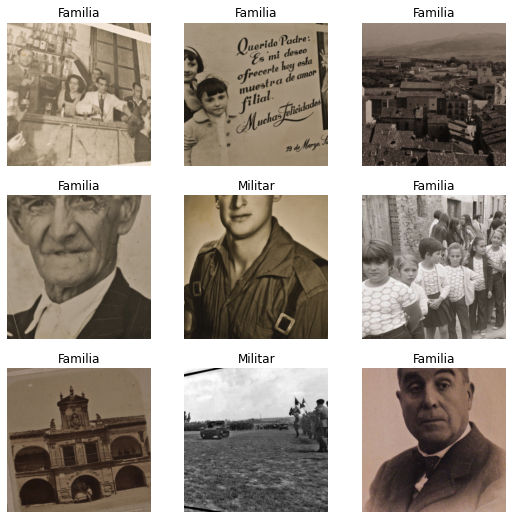

In [25]:
dls.show_batch(max_n=9)

In [27]:
learn = cnn_learner(dls,resnet18,metrics=accuracy).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/autocast_mode.py:118: UserWarning: torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.autocast only affects CUDA ops, but CUDA is not available.  Disabling.")


In [ ]:
learn.fine_tune(10,base_lr=1e-3)

/usr/local/lib/python3.7/dist-packages/torch/cuda/amp/grad_scaler.py:116: UserWarning: torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.
  warnings.warn("torch.cuda.amp.GradScaler is enabled, but CUDA is not available.  Disabling.")


epoch,train_loss,valid_loss,accuracy,time


In [ ]:
learn.export()

In [ ]:
Path().ls(file_exts='.pkl')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()

In [ ]:
dbTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dlsTest = dbTest.dataloaders(path,bs=64)

In [ ]:
learn.dls = dlsTest

In [ ]:
learn.validate()